In [1]:
import numpy as np # numpy is used to create the numpy arrays
import pandas as pd # pandas is used to work with the dataset
import matplotlib.pyplot as plt  # is used to visualize the data

In [2]:
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
# isna function checks for the missing values and the sum fucntion accumulates the missing values
df.isna().sum()
#We can see that there are no missing values in this as all sum up to 0

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
print('mean and median of the age column')
print(df['age'].mean())
print(df['age'].median())
# no outliers are present

mean and median of the age column
39.20702541106129
39.0


In [7]:
print('mean and median of the Salary column')
print(df['bmi'].mean())
print(df['bmi'].median())
# no outliers are present

mean and median of the Salary column
30.66339686098655
30.4


In [8]:
print('mean and median of the Children column')
print(df['children'].mean())
print(df['children'].median())
# no outliers are present

mean and median of the Children column
1.0949177877429
1.0


In [9]:
print('frequency count for sex column')
print(df["sex"].value_counts())
print('frequency count for smoker column')
print(df["smoker"].value_counts())
print('frequency count for region column')
print(df["region"].value_counts())

frequency count for sex column
male      676
female    662
Name: sex, dtype: int64
frequency count for smoker column
no     1064
yes     274
Name: smoker, dtype: int64
frequency count for region column
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [10]:
x = df.iloc[:,:-1].values # values function is used to extract only values from the datafram and store them as ndarray
y = df.iloc[:,-1].values
print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder(),[1,4,5])], remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
np.set_printoptions(suppress = True)
print(x)
# the data after scalling is stored in scientific notation to change it into a readable format
# we use np.set_printoptions(suppress = True)

[[ 1.0105187  -1.0105187  -1.97058663 ... -1.43876426 -0.45332
  -0.90861367]
 [-0.98959079  0.98959079  0.5074631  ... -1.50996545  0.5096211
  -0.07876719]
 [-0.98959079  0.98959079  0.5074631  ... -0.79795355  0.38330685
   1.58092576]
 ...
 [ 1.0105187  -1.0105187   0.5074631  ... -1.50996545  1.0148781
  -0.90861367]
 [ 1.0105187  -1.0105187   0.5074631  ... -1.29636188 -0.79781341
  -0.90861367]
 [ 1.0105187  -1.0105187  -1.97058663 ...  1.55168573 -0.26138796
  -0.90861367]]


## Applying PCA

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components= 2)
x = pca.fit_transform(x)
var=pca.explained_variance_ratio_
print(var)

[0.19774273 0.16876007]


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(x_train,y_train) 

LinearRegression()

In [16]:
y_pred = regressor.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

5830.778381620586
55978198.59755853
7481.857964273215
0.6444350250443859


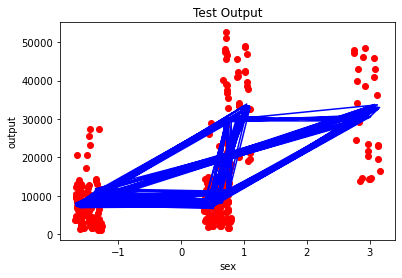

In [18]:
# for 2-D i will be using bmi column and the y
plt.scatter(x_test[:,1],y_test,color = 'red')
plt.plot(x_test[:,1],y_pred,color = 'blue')
plt.title('Test Output')
plt.xlabel('sex')
plt.ylabel('output')
plt.show()

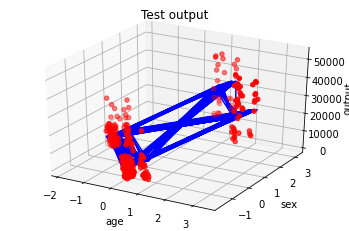

In [19]:
# for 3D i will use age, bmi and Y
from mpl_toolkits import mplot3d
# to create a 3d plot we add a 3D subplot on a matplotlib figure
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],y_test, color = 'red')
ax.plot3D(x_test[:,0],x_test[:,1],y_pred, color = 'blue')
ax.set_title('Test output')
ax.set_xlabel('age')
ax.set_ylabel('sex')
ax.set_zlabel('output')
plt.show()